In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [2]:
col_names = [f'A{i}' for i in range(1, 17)]
df = pd.read_csv('crx.data', names=col_names, header=0)

In [3]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [4]:
def preprocess(df):
  df = df.replace('?', np.NaN)
  df = df.replace({'A1': {'a': 1, 'b': 0}, 'A9': {'t': 1, 'f': 1}, 'A10': {'t': 1, 'f': 1}, 'A12': {'t': 1, 'f': 1}, 'A16': {'+': 1, '-': 0}})
  df = df.astype({'A1': 'boolean', 'A2': 'float64', 'A3': 'float64', 'A8': 'float64', 'A9': 'boolean', 'A10': 'boolean', 'A11': 'Int64', 'A12': 'boolean', 'A14': 'Int64', 'A15': 'Int64', 'A16': 'boolean'})
  return df

In [5]:
df = preprocess(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      677 non-null    boolean
 1   A2      677 non-null    float64
 2   A3      689 non-null    float64
 3   A4      683 non-null    object 
 4   A5      683 non-null    object 
 5   A6      680 non-null    object 
 6   A7      680 non-null    object 
 7   A8      689 non-null    float64
 8   A9      689 non-null    boolean
 9   A10     689 non-null    boolean
 10  A11     689 non-null    Int64  
 11  A12     689 non-null    boolean
 12  A13     689 non-null    object 
 13  A14     676 non-null    Int64  
 14  A15     689 non-null    Int64  
 15  A16     689 non-null    boolean
dtypes: Int64(3), boolean(5), float64(3), object(5)
memory usage: 68.1+ KB


In [7]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [8]:
df.isnull().any(axis=1).sum()

37

dane z nullami można wydropić bo jest ich mniej niż 5%, ale uzupełnimy medianą (numeryczne) i modą (kategoryczne), bo to nadal dośc mały zbiór danych

In [9]:
def handle_nulls(df):
  imputer_mean = SimpleImputer(missing_values=np.nan, strategy='median')
  numerical = ['A1', 'A2', 'A3', 'A8', 'A9', 'A10', 'A11', 'A12', 'A14', 'A15', 'A16']
  df_numerical = df[numerical]
  imputer_mean.fit(df_numerical)
  df[numerical] = imputer_mean.transform(df_numerical)

  imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  categorical = ['A4', 'A5', 'A6', 'A7', 'A13']
  df_categorical = df[categorical]
  imputer_mode.fit(df_categorical)
  df[categorical] = imputer_mode.transform(df_categorical)

  return df

In [10]:
df = handle_nulls(df)

In [11]:
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [12]:
df.isnull().any(axis=1).sum()

0

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='A1', ylabel='A1'>,
        <Axes: xlabel='A2', ylabel='A1'>,
        <Axes: xlabel='A3', ylabel='A1'>,
        <Axes: xlabel='A8', ylabel='A1'>,
        <Axes: xlabel='A9', ylabel='A1'>,
        <Axes: xlabel='A10', ylabel='A1'>,
        <Axes: xlabel='A11', ylabel='A1'>,
        <Axes: xlabel='A12', ylabel='A1'>,
        <Axes: xlabel='A14', ylabel='A1'>,
        <Axes: xlabel='A15', ylabel='A1'>,
        <Axes: xlabel='A16', ylabel='A1'>],
       [<Axes: xlabel='A1', ylabel='A2'>,
        <Axes: xlabel='A2', ylabel='A2'>,
        <Axes: xlabel='A3', ylabel='A2'>,
        <Axes: xlabel='A8', ylabel='A2'>,
        <Axes: xlabel='A9', ylabel='A2'>,
        <Axes: xlabel='A10', ylabel='A2'>,
        <Axes: xlabel='A11', ylabel='A2'>,
        <Axes: xlabel='A12', ylabel='A2'>,
        <Axes: xlabel='A14', ylabel='A2'>,
        <Axes: xlabel='A15', ylabel='A2'>,
        <Axes: xlabel='A16', ylabel='A2'>],
       [<Axes: xlabel='A1', ylabel='A3'>,
        <Axes: xlabe

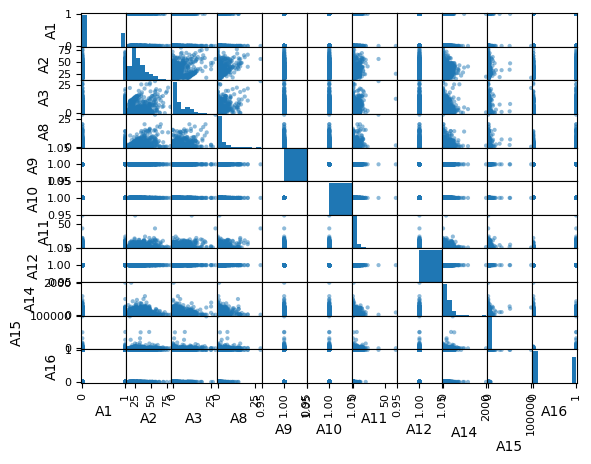

In [13]:
scatter_matrix(df)

In [14]:
def one_hot_encoding(df):
  to_encode = ['A4', 'A5', 'A6', 'A7', 'A13']
  for column in to_encode:
    dummies = pd.get_dummies(df[[column]], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([column], axis=1)
  
  return df

In [15]:
df = one_hot_encoding(df)
df.head()

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
0,1.0,58.67,4.460,3.04,1.0,1.0,6.0,1.0,43.0,560.0,...,0,1,0,0,0,0,0,1,0,0
1,1.0,24.50,0.500,1.50,1.0,1.0,0.0,1.0,280.0,824.0,...,0,1,0,0,0,0,0,1,0,0
2,0.0,27.83,1.540,3.75,1.0,1.0,5.0,1.0,100.0,3.0,...,0,0,0,0,0,1,0,1,0,0
3,0.0,20.17,5.625,1.71,1.0,1.0,0.0,1.0,120.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,0.0,32.08,4.000,2.50,1.0,1.0,0.0,1.0,360.0,0.0,...,0,0,0,0,0,1,0,1,0,0


In [16]:
def normalization(df, columns):
  for column in columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
  return df

def standarization(df, columns):
  for column in columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
  return df

In [17]:
to_norm_std = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

df_normalized = df.copy(deep=True)
df_normalized = normalization(df_normalized, to_norm_std)

df_standardized = df.copy(deep=True)
df_standardized = standarization(df_standardized, to_norm_std)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      689 non-null    float64
 1   A2      689 non-null    float64
 2   A3      689 non-null    float64
 3   A8      689 non-null    float64
 4   A9      689 non-null    float64
 5   A10     689 non-null    float64
 6   A11     689 non-null    float64
 7   A12     689 non-null    float64
 8   A14     689 non-null    float64
 9   A15     689 non-null    float64
 10  A16     689 non-null    float64
 11  A4_l    689 non-null    uint8  
 12  A4_u    689 non-null    uint8  
 13  A4_y    689 non-null    uint8  
 14  A5_g    689 non-null    uint8  
 15  A5_gg   689 non-null    uint8  
 16  A5_p    689 non-null    uint8  
 17  A6_aa   689 non-null    uint8  
 18  A6_c    689 non-null    uint8  
 19  A6_cc   689 non-null    uint8  
 20  A6_d    689 non-null    uint8  
 21  A6_e    689 non-null    uint8  
 22  A6

In [ ]:
def cross_validation(model):
  #split data
  #impude data
  #learn model
  return